In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 3. Работа с Pandas

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12
...,...,...
3280,2016-12-27,1
3281,2016-12-28,-3
3282,2016-12-29,0
3283,2016-12-30,3


С помощью `Pandas` решите следующие задачи

**3.1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
stat = []
for year in range(2008, 2017):
    year_frame = df.loc[(df.Day >= pd.to_datetime(str(year))) & (df.Day < pd.to_datetime(str(year+1)))]
    temp = year_frame.t.mean()
    stat.append((year, round(temp, 2)))
    
stat = sorted(stat, key=lambda tup: tup[1])
print(f"Answer:\nMin - {stat[0]}, Max - {stat[-1]}")

Answer:
Min - (2012, 6.98), Max - (2015, 9.08)


**3.2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [5]:
stat = []
for year in range(2008, 2017):
    januaries = df.loc[(df.Day >= pd.to_datetime(f"{year}-1")) & (df.Day < pd.to_datetime(f"{year}-2"))]
    hier_zero = januaries.loc[januaries.t >= 0]
    stat.append((year, len(hier_zero)))
stat = sorted(stat, key=lambda tup: tup[1])
print(f"Answer - {stat[-1]}")

Answer - (2008, 19)


**3.3.** В каком году было самое холодное лето (по средней температуре)

In [6]:
stat = []
for year in range(2008, 2017):
    summer = df.loc[(df.Day >= pd.to_datetime(f"{year}-6")) & (df.Day < pd.to_datetime(f"{year}-9"))]
    temp = summer.t.mean()
    stat.append((year, round(temp, 2)))
stat = sorted(stat, key=lambda tup: tup[1])
print(f"\nAnswer - {stat[0]}")


Answer - (2008, 18.12)


**3.4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [7]:
dl = df.copy()
dl['delta'] = dl.t.shift(-1) - dl.t
dl = dl.sort_values(by=['delta'])
dl.head(1)

,Day,t,delta
2334,2014-05-26,22,-15.0


**3.5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

<AxesSubplot: >

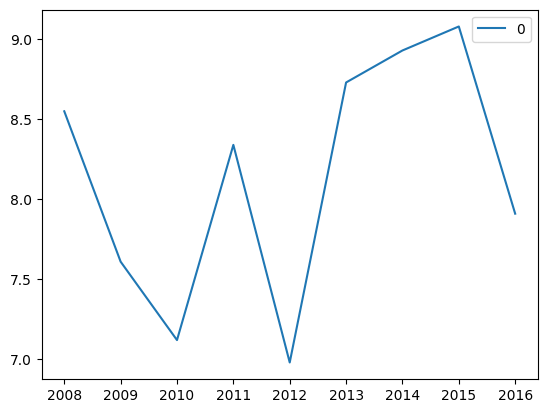

In [8]:
years = []
mean_temp = []
for year in range(2008, 2017):
    year_frame = df.loc[(df.Day >= pd.to_datetime(str(year))) & (df.Day < pd.to_datetime(str(year+1)))]
    mean_temp.append(round(year_frame.t.mean(), 2))
    years.append(year)

res = pd.DataFrame(mean_temp, years)
res.plot()